## Model building in Scikit-learn
Let's build the diabetes prediction model.

Here, you are going to predict diabetes using the Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. You can download data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database or select a dataset from DataCamp: https://www.datacamp.com/workspace/datasets. 

### Loading Data
We will simplify columns by providing col_names to pandas read_csv() function.

In [19]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv(r"C:\Users\santh\Downloads\DS_78_Diabetes_Dataset.csv",  names=col_names, skiprows=1)

In [20]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Selecting Feature
Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [21]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [22]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

## Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict(). 

In [23]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\santh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [24]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 24,  43]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2x2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 115 and 39 are actual predictions, and 30 and 8 are incorrect predictions.



## Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 427.9555555555555, 'Predicted label')

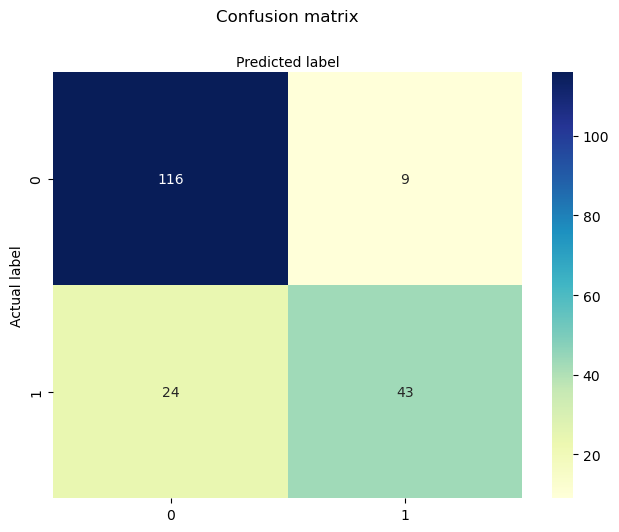

In [26]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Confusion Matrix Evaluation Metrics
Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [27]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.83      0.93      0.88       125
   with diabetes       0.83      0.64      0.72        67

        accuracy                           0.83       192
       macro avg       0.83      0.78      0.80       192
    weighted avg       0.83      0.83      0.82       192



Well, you got a classification rate of 80%, considered as good accuracy.

**Precision:** Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 73% of the time.

**Recall:** If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 57% of the time.

## The F1 score

### Accuracy
Accuracy is a metric for classification models that measures the number of predictions that are correct as a percentage of the total number of predictions that are made. As an example, if 90% of your predictions are correct, your accuracy is simply 90%.

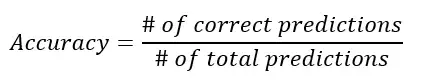

Accuracy is a useful metric only when you have an equal distribution of classes on your classification. This means that if you have a use case in which you observe more data points of one class than of another, the accuracy is not a useful metric anymore. Let’s see an example to illustrate this:

### Imbalanced data example
*Imagine you are working on the sales data of a website. You know that 99% of website visitors don’t buy and that only 1% of visitors buy something. You are building a classification model to predict which website visitors are buyers and which are just lookers.*

Now imagine a model that doesn’t work very well. It predicts that 100% of your visitors are just lookers and that 0% of your visitors are buyers. It is clearly a very wrong and useless model.

## **Accuracy is not a good metric to use when you have class imbalance.**

What would happen if we’d use the accuracy formula on this model? Your model has predicted only 1% wrongly: all the buyers have been misclassified as lookers. The percentage of correct predictions is therefore 99%. The problem here is that an accuracy of 99% sounds like a great result, whereas your model performs very poorly. In conclusion: accuracy is not a good metric to use when you have class imbalance.

## Solving imbalanced data through resampling
One way to solve class imbalance problems is to work on your sample. With specific sampling methods, you can resample your data set in such a way that the data is not imbalanced anymore. You can then use accuracy as a metric again. In this article, you can find out how to use such methods including undersampling, oversampling, and SMOTE data augmentation.https://towardsdatascience.com/smote-fdce2f605729


## Solving imbalanced data through metrics
Another way to solve class imbalance problems is to use better accuracy metrics like the F1 score, which take into account not only the number of prediction errors that your model makes, but that also look at the type of errors that are made.

### Precision and Recall: foundations of the F1 score
Precision and Recall are the two most common metrics that take into account class imbalance. They are also the foundation of the F1 score! Let’s have a better look at Precision and Recall before combining them into the F1 score in the next part.

## Precision: the first part of the F1 score
Precision is the first part of the F1 Score. It can also be used as an individual machine learning metric. It’s formula is shown here:

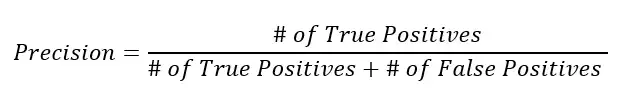

You can interpret this formula as follows. Within everything that has been predicted as a positive, precision counts the percentage that is correct:

* A not precise model may find a lot of the positives, but its selection method is noisy: it also wrongly detects many positives that aren’t actually positives.
* A precise model is very “pure”: maybe it does not find all the positives, but the ones that the model does class as positive are very likely to be correct.

## Recall: the second part of the F1 score
Recall is the second component of the F1 Score, although recall can also be used as an individual machine learning metric. The formula for recall is shown here:

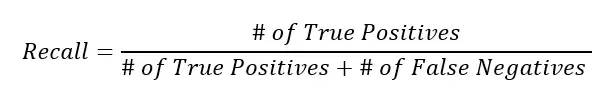

You can interpret this formula as follows. Within everything that actually is positive, how many did the model succeed to find:

* A model with high recall succeeds well in finding all the positive cases in the data, even though they may also wrongly identify some negative cases as positive cases.
* A model with low recall is not able to find all (or a large part) of the positive cases in the data.

## Precision vs Recall
To clarify, think of the following example of a supermarket that has sold a product with a problem, and they need to recall it: they are only interested in making sure that they find all the problematic products back. It does not really matter to them if clients send back some non-problematic products as well, so the precision is not of interest to this supermarket.

## Precision-Recall Trade-Off
Ideally, we would want both: a model that identifies all of our positive cases and that is at the same time identifies only positive cases.

In real life, we, unfortunately, have to deal with the so-called Precision-Recall Trade-Off.

The Precision-Recall Trade-Off represents the fact that in many cases, you can tweak a model to increase precision at a cost of a lower recall, or on the other hand increase recall at the cost of lower precision.

The F1 score: combining Precision and Recall
Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric. At the same time, the F1 score has been designed to work well on imbalanced data.

## F1 score formula
The F1 score is defined as the harmonic mean of precision and recall.

As a short reminder, the harmonic mean is an alternative metric for the more common arithmetic mean. It is often useful when computing an average rate.

In the F1 score, we compute the average of precision and recall. They are both rates, which makes it a logical choice to use the harmonic mean. The F1 score formula is shown here:

This makes that the formula for the F1 score is the following:

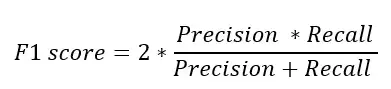

Since the F1 score is an average of Precision and Recall, it means that the F1 score gives equal weight to Precision and Recall:

* A model will obtain a high F1 score if both Precision and Recall are high
* A model will obtain a low F1 score if both Precision and Recall are low
* A model will obtain a medium F1 score if one of Precision and Recall is low and the other is high

## Should the F1 score replace other metrics?
Throughout the article, you have seen a number of definitions. Before moving starting to implement the F1 Score in Python, let’s sum up when to use the F1 Score and how to benchmark it against other metrics.

## Accuracy vs Precision and Recall
Accuracy is the simplest classification metric. It simply measures the percentage of correct predictions that a machine learning model has made. You have seen that accuracy is a bad metric in the case of imbalanced data because it cannot distinguish between specific types of errors (false positives and false negatives).

Precision and Recall are performance metrics that are more suitable when having imbalanced data because they allow taking into account the type of errors (false positives or false negatives) that your model makes.

## F1 Score vs Precision and Recall
The F1 Score combines Precision and Recall into a single metric. In many situations, like automated benchmarking, or grid search,: https://towardsdatascience.com/gridsearch-the-ultimate-machine-learning-tool-6cd5fb93d07 it is much more convenient to have only one performance metric rather than multiple.

## Should you use the F1 Score?
In conclusion, when you have the possibility to do so, you should definitely look at multiple metrics for each of the models that you try out. Each metric has advantages and disadvantages and each of them will give you specific information on the strengths and weaknesses of your model.

The real difficulty of choice occurs when doing automated model training, or when using Grid Search :(https://towardsdatascience.com/gridsearch-the-ultimate-machine-learning-tool-6cd5fb93d07) for tuning models. In those cases, you'll have to specify a single metric that you want to optimize.

In this case, my advice would be to have a good look at multiple different metrics of one or a few sample models. Then, when you understand the implications for your specific use case, you can choose one metric for optimization or tuning.

If you move your model to production for long-term use, you should regularly come back to do model maintenance and verify if the model is still behaving as it should be.

## The F1 score in Python
Let’s now get to an example in which we will understand the added value of the F1 Score. We will use an example data set that contains data on a number of website visitors.

The goal of the exercise will be to build a simple classification model that uses four independent variables to predict whether the visitor will buy something. We will see how to use different metrics, and we will see how different metrics will give us different conclusions.

The same data set was used in this article which proposes to use the SMOTE upsampling technique to improve model performance.(https://towardsdatascience.com/smote-fdce2f605729)

We will not use SMOTE here, as the goal is to demonstrate the F1 score. Yet, if you’re interested in handling imbalanced data, it could definitely be worth it to combine both methods.

## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

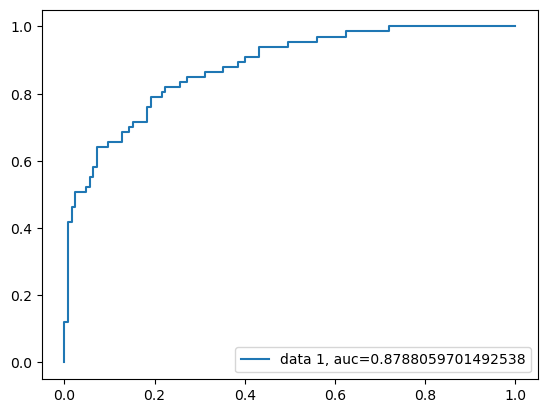

In [29]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

### Advantages
Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

### Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.